<DIV ALIGN=CENTER>

# Gradient Boosted Trees
## Professor Robert J. Brunner
  
</DIV>  
-----
-----


## Introduction

In this IPython Notebook, we explore how to effectively use the ensemble
technique of boosting by using Gradient Boosted Trees (GBT). First, we
repeat the analysis of the Iris and hand-written digit data used in the
[DT][l1] and [RF][l2] IPython Notebooks. However, we now switch to the
GBT algorithm. Throughout this Notebook, you should think about how
these results from this algorithm are different than the results from
the other algorithms, in particular the RF algorithm that employs
baggin. Also, explore how changes in the default parameters might affect
the performance of this algorithm, such as using different loss
functions or changing the numebr of estimators.

First, we will setup this Notebook, and then introduce the Iris data,
before making classifications for this data by using the scikit learn's
[Gradient Boosted Trees][gbtsk] algorithm.

-----
[l1]: intro2dt.ipynb
[l2]: intro2rf.ipynb
[gbtsk]: http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting

In [1]:
# Set up Notebook

% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


-----

## Iris Data

We will use the standard Iris classification data set to explore how to
use ensemble classification algorithms, in this Notebook we focus on
Gradient Boosted Trees, or GBT. The four primary dimensions of the data
include Sepal Length, Sepal Width, Petal Length, and Petal Width, which
can be seen from the following Iris picture (or type _virginica_).

![Iris picture from Wikipedia](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/220px-Iris_virginica.jpg)

The data set consists of 150 total measurements of three different types
of Iris flowers, equally divided between three classes: Iris Setosa,
Iris versicolor, and Iris virginica. Before proceeding, we can examine
the Pandas DataFrame that contains these data.

-----

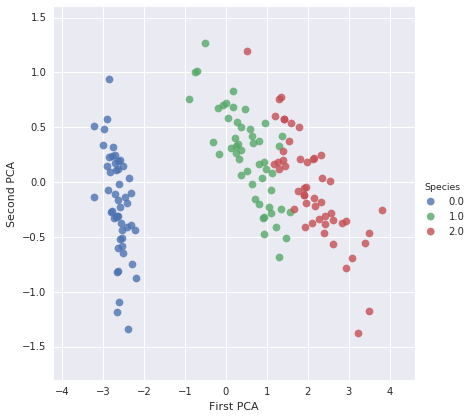

In [2]:
from helper_code import iris as hi

import pandas as pd

data = hi.get_data()
mdata = hi.get_mdata(data)

x = data[:, 0:2]
y = data[:, 2]

# SHow the data
cols = ['PCA1', 'PCA2', 'Species']

hi.scplot_data('PCA1', 'PCA2', pd.DataFrame(data, columns = cols), 'Species',
               'First PCA', 'Second PCA', (-4.2, 4.6), (-1.8, 1.6), 6)

-----

## [Gradient Bosted Trees][gbt] (GBT)

The next algorithm we will demonstrate is a powerful, but simple
approach to  combining _weak_ learners that employs what is known as
**boosting**. In this case, we start with one estimator and continue to
add new estimators that are designed to improve on the previous
estimator. This is easy to understand when the estimator is a decision
tree. In this case, we build one tree, and use its results to produce a
new, better decision tree estimator. The approach can leverage different
loss functions that generate the improved estimate (essentially we are
trying to minimize the difference between the previous estimator and the
truth).

We perform boosting in scikit-learn by specifying either the Adaboost or
the Gradient Boosted Tree algorithm, in this notebook we limit our
discussion to GBT. GBT is a flexible algorithm, that can provide robust
results, especially in classification with a small number of targets.
GBT also supports regularization methods to minimize overfitting. Once
we fit the model to the data, we can once again use the trained model to
make predictions, which we can test by using the evaluation score and
confusion matrix.

-----

[gbt]: https://en.wikipedia.org/wiki/Gradient_boosting

GBT prediction accuracy =  92.1%


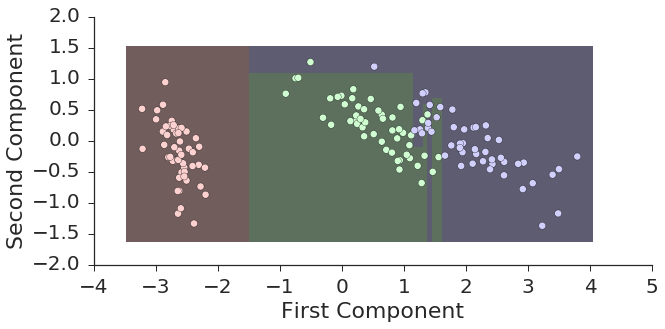

In [3]:
import sklearn.cross_validation as cv
(x_train, x_test, y_train, y_test) = cv.train_test_split(x, y, test_size=.25)

from sklearn.ensemble import GradientBoostingClassifier

gbtc = GradientBoostingClassifier(n_estimators=100, max_depth=4)

gbtc.fit(x_train, y_train)

z = gbtc.predict(mdata)

hi.splot_data(data, mdata, z, 'First Component', 'Second Component', 50)

print("GBT prediction accuracy = {0:5.1f}%".format(100.0 * gbtc.score(x_test, y_test)))

In [4]:
from sklearn.metrics import classification_report

y_pred = gbtc.predict(x_test)
print(classification_report(y_test, y_pred, \
                            target_names = ['Setosa', 'Versicolor', 'Virginica']))

             precision    recall  f1-score   support

     Setosa       1.00      1.00      1.00        17
 Versicolor       0.78      0.88      0.82         8
  Virginica       0.92      0.85      0.88        13

avg / total       0.92      0.92      0.92        38



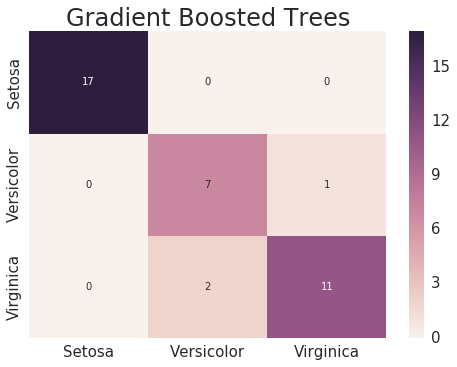

In [5]:
from helper_code import mlplots as mlp

mlp.confusion(y_test, y_pred, ['Setosa', 'Versicolor', 'Virginica'], 3, 'Gradient Boosted Trees')

-----

## Student Activity

In the preceding cells, we used an ensemble GBT model to predict
classifications for the Iris Data. Now that you have run this Notebook
once, go back and make the following changes to see how the results
change.

1. Change the cross-validation split size, for example change from a
75%:25% to a 50%:50%?
2. Change the default parameters in the GBT algorithm, for example, the
`loss`, `learning_rate`, `n_estimators`, `subsample`, and
`max_features`. Read the code documentation to learn about the default
parameters.


How does the two-dimensional figure compare to the same figure in the RF Notebook?

-----

## Handwritten Digits

Now we switch to a second type of data and explore GBT classification
applied to handwritten digits. First we will load the data and review
some of the sample. After which, we will apply a GBT model to these data
and explore the resulting predictions.

-----

Total number of samples = 1797


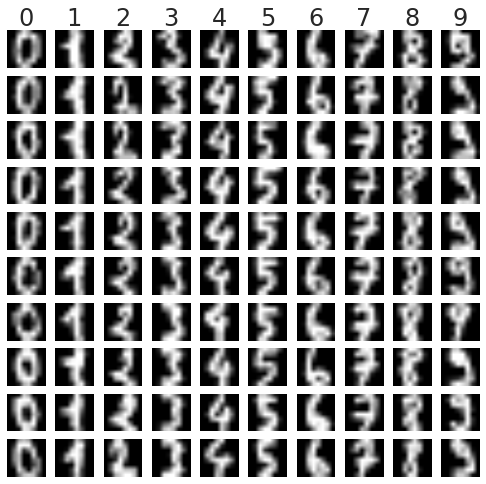

In [6]:
# We have helper code to assist in the loading and plotting of these data
from helper_code import digits as hd

# We extract features (x), labels (y), and the images for plotting.
x, y, images = hd.get_data()
hd.im_plot(x, y, images)

print('Total number of samples = {0}'.format(y.shape[0]))

-----

### Classification of image data

Now that these data are loaded, we can apply a GBT  to this problem.
Below we employ the Gradient Boosted Tree model, and show the
classification score, the classification report, and the confusion
matrix.

-----

In [7]:
(x_train, x_test, y_train, y_test) = cv.train_test_split(x, y, test_size=.25)

gbtc = GradientBoostingClassifier(n_estimators=250, max_depth=5)

gbtc.fit(x_train, y_train)

print('Prediction Accuracy = {0:3.1f}%'.format(100*gbtc.score(x_test, y_test)))

Prediction Accuracy = 96.0%


In [8]:
y_pred = gbtc.predict(x_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99        49
          1       0.91      0.95      0.93        41
          2       0.98      1.00      0.99        48
          3       0.98      1.00      0.99        44
          4       0.95      0.93      0.94        40
          5       0.95      0.95      0.95        40
          6       0.98      0.95      0.96        43
          7       0.94      0.94      0.94        48
          8       0.95      0.90      0.92        40
          9       0.98      0.96      0.97        57

avg / total       0.96      0.96      0.96       450



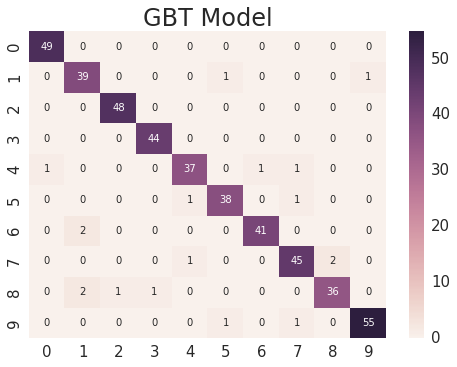

In [9]:
nms = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

mlp.confusion(y_test, y_pred, nms, 10, 'GBT Model')

-----

### Model Evaluation

The GBT model performed in a reasonable manner, but what about on
completely blind data. We can test the model by _making_ new data. Below
we use methods in the helper code to make _fake_ data, in this case
images of **one** and **seven**. We display the _fake_ images, and then
the results of our model classifying these new data.

-----

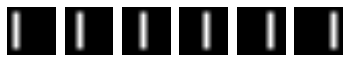

In [10]:
# Test on our sevens

ones = hd.make_ones()

hd.plot_numbers(ones)

In [11]:
# You can change the values to make other numbers.

ones[0].reshape(8,8)

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  16.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  16.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  16.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  16.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  16.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  16.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [12]:
print('Actual : Predicted')

for one in ones:
    print('  1    :     {0}'.format(gbtc.predict(one.ravel())[0])) 

Actual : Predicted
  1    :     6
  1    :     4
  1    :     6
  1    :     6
  1    :     1
  1    :     6


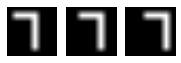

In [13]:
# Now test on our sevens

sevens = hd.make_sevens()
hd.plot_numbers(sevens)

In [14]:
print('Actual : Predicted')
for seven in sevens:
    print('  7    :     {0}'.format(gbtc.predict(seven.ravel())[0])) 

Actual : Predicted
  7    :     6
  7    :     1
  7    :     0


-----

## Student Activity

In the preceding cells, we used a Gradient Boosted Tree model to predict
classifications for the digit data. Now that you have run the Notebook,
go back and make the following changes to see how the results change.

1. Change the cross-validation split size, for example change from a
75%:25% to a 50%:50%?
2. Change the default parameters in the GBT, for example `loss` and
`learning_rate`. Read the code documentation to learn about the default
parameters.

Finally can you explain (feel free to use the class forums) why the
model performed in the  manner it did for the _fake_ digits? How did
this compare to the RF model?

-----